# Dataset Overview

This dataset represents boston marathon results from 2014. Contains approximately 32000 observations across 21 columns.

In [617]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import re

%matplotlib inline

# Read Data In

In [536]:
boston = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [537]:
boston.shape

(31984, 21)

In [538]:
boston.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [539]:
list(boston.columns)

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k']

In [540]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [541]:
boston.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


# Exploratory Analysis

In [542]:
# # First remove '-' from all columns

def non_decimal(x):
    x = str(x)
    if x.find('-') != -1:
        return np.nan
    else:
        return float(x)

boston['5k'] = boston['5k'].apply(non_decimal)    
boston['10k'] = boston['10k'].apply(non_decimal)
boston['20k'] = boston['20k'].apply(non_decimal)
boston['25k'] = boston['25k'].apply(non_decimal)
boston['half'] = boston['half'].apply(non_decimal)
boston['30k'] = boston['30k'].apply(non_decimal)
boston['35k'] = boston['35k'].apply(non_decimal)
boston['40k'] = boston['40k'].apply(non_decimal)
boston['official'] = boston['official'].apply(non_decimal)

display(boston.head(5))

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


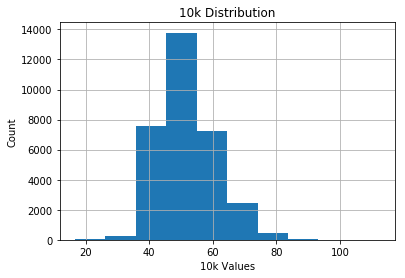

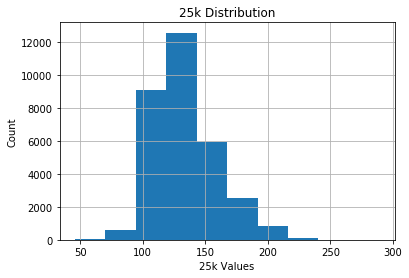

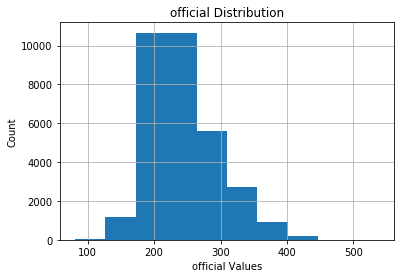

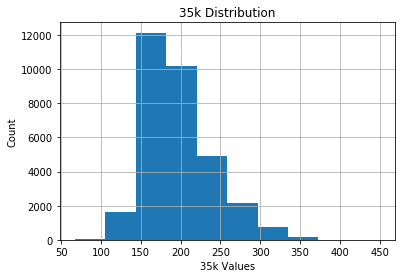

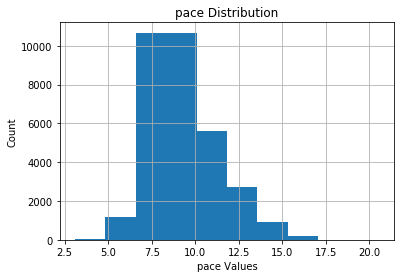

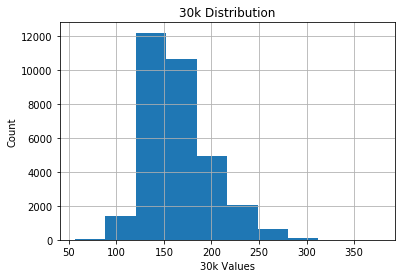

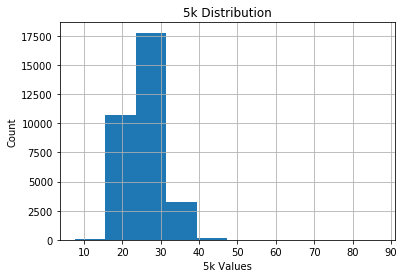

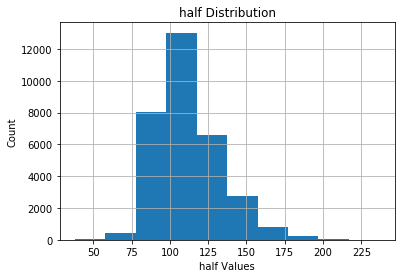

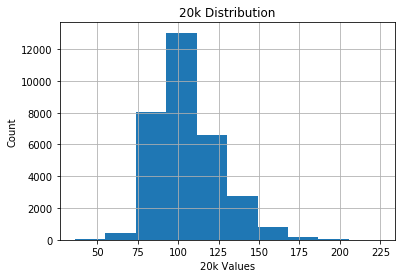

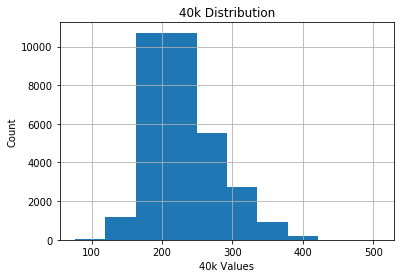

In [543]:
# Plot histograms for all continuous data
for col in boston.dtypes[boston.dtypes == 'float64'].index:
    boston[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

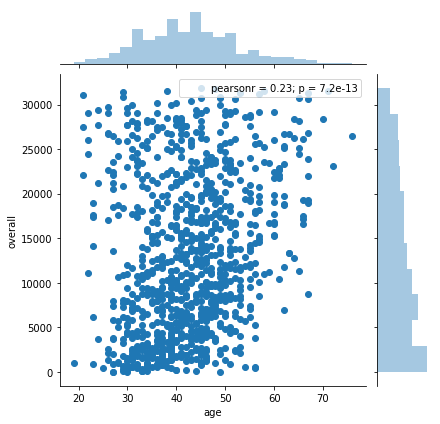

In [544]:
#Age vs. Overall

sns.jointplot(x="age", y="overall", data=boston.dropna())
plt.show()

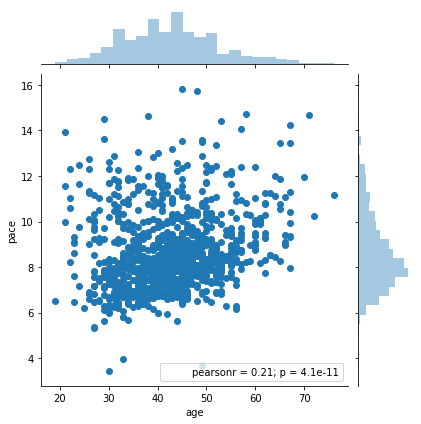

In [545]:
#Age/Gender vs. Pace

sns.jointplot(x="age", y="pace", data=boston.dropna())
plt.show()

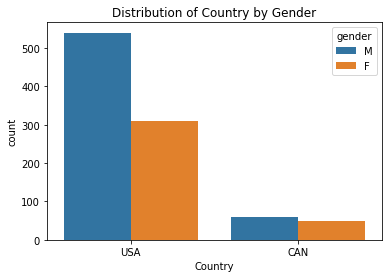

In [546]:
#Countplot of country with gender

sns.countplot(x='country', hue='gender', data=boston.dropna())
plt.title('Distribution of Country by Gender')
plt.xlabel('Country')
plt.show()

# Data Cleaning

In [547]:
#Determine missing values across dataframe

missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64


In [548]:
categorical = boston.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique()) 

name
31915
gender
2
bib
31984
ctz
84
state
68
country
78
city
5934


In [549]:
#Remove columns with many unique values, for perfomance purposes - name, bib, ctz, city
#Drop features

boston = boston.drop(['name'], 1)
boston = boston.drop(['bib'], 1)
boston = boston.drop(['ctz'], 1)
boston = boston.drop(['city'], 1)

In [550]:
#Drop null values
boston = boston.dropna()

In [551]:
#Confirm no missing values
missing_values_count = boston.isnull().sum()
print(missing_values_count)

10k          0
division     0
25k          0
gender       0
age          0
official     0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
40k          0
dtype: int64


# Use K Means to Estimate Clusters

In [560]:
#Establish X

X_categorical = boston.loc[:, boston.columns.isin(['gender', 'state', 'country'])]
X_categorical = pd.get_dummies(X_categorical)
print(X_categorical.shape)

X_continuous = boston.loc[:, ~(boston.columns).isin(['gender', 'state', 'country'])]
saved_cols = X_continuous.columns
X_continous_norm = normalize(X_continuous)
X_continuous = pd.DataFrame(X_continous_norm)
X_continuous.columns = saved_cols
print(X_continuous.shape)

X_continuous.index = X_categorical.index
X = pd.concat([X_continuous, X_categorical], axis=1)
print(X.shape)


(29103, 72)
(29103, 14)
(29103, 86)


In [563]:
#Establish training set
X_train = X.copy()

In [564]:
#Confirm this worked
X_train.head(5)

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_YT,country_CAN,country_USA
9,0.111376,0.073081,0.283848,0.113276,0.503640,0.073081,0.410242,0.073081,0.019257,0.346333,...,0,0,0,0,0,0,0,0,0,1
14,0.097875,0.074321,0.279447,0.165793,0.499666,0.074321,0.416369,0.074321,0.019152,0.347708,...,0,0,0,0,0,0,0,0,1,0
15,0.115831,0.034138,0.290279,0.102415,0.491251,0.034138,0.408568,0.157037,0.018776,0.349577,...,0,0,0,0,0,0,0,0,0,1
24,0.099684,0.076261,0.274159,0.256020,0.486983,0.076261,0.408270,0.076261,0.018630,0.339526,...,0,0,0,0,0,0,0,0,1,0
27,0.103961,0.083036,0.278614,0.166072,0.495560,0.083036,0.415291,0.083036,0.018932,0.347202,...,0,0,0,0,0,0,0,0,0,1


In [565]:
# #Declare and fit the model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

#Extract cluster assignments for each data point and add as a column in DataFrame
boston['labels'] = kmeans.labels_

# Get to Know Our Clusters

In [587]:
#Find size of each cluster
boston['labels'].value_counts()

0    14342
1    12597
2     2164
Name: labels, dtype: int64

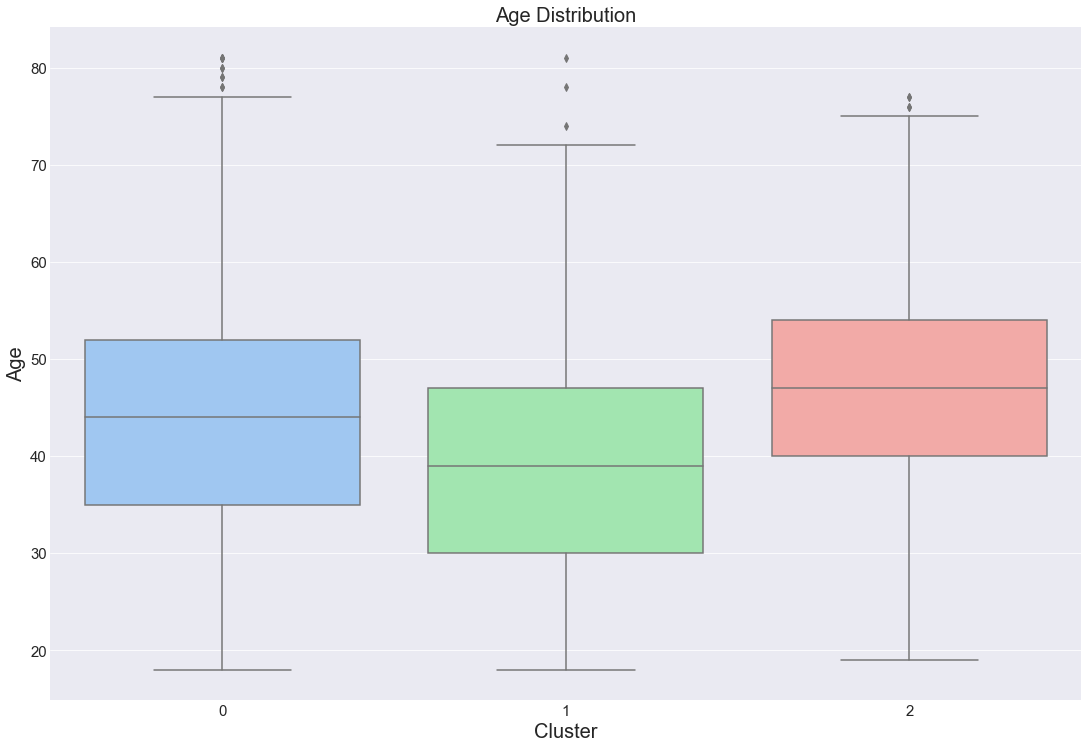

count    29103.000000
mean        42.054256
std         11.348288
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64




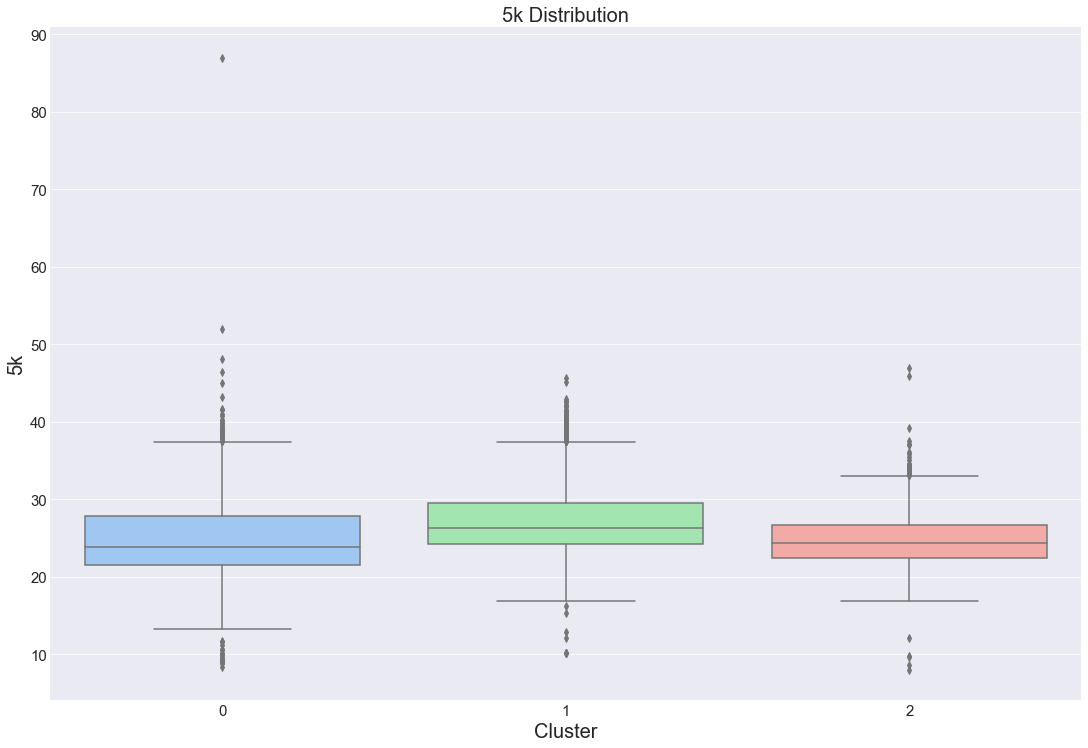

count    29103.000000
mean        25.779254
std          4.207013
min          8.020000
25%         22.730000
50%         25.150000
75%         28.500000
max         86.950000
Name: 5k, dtype: float64




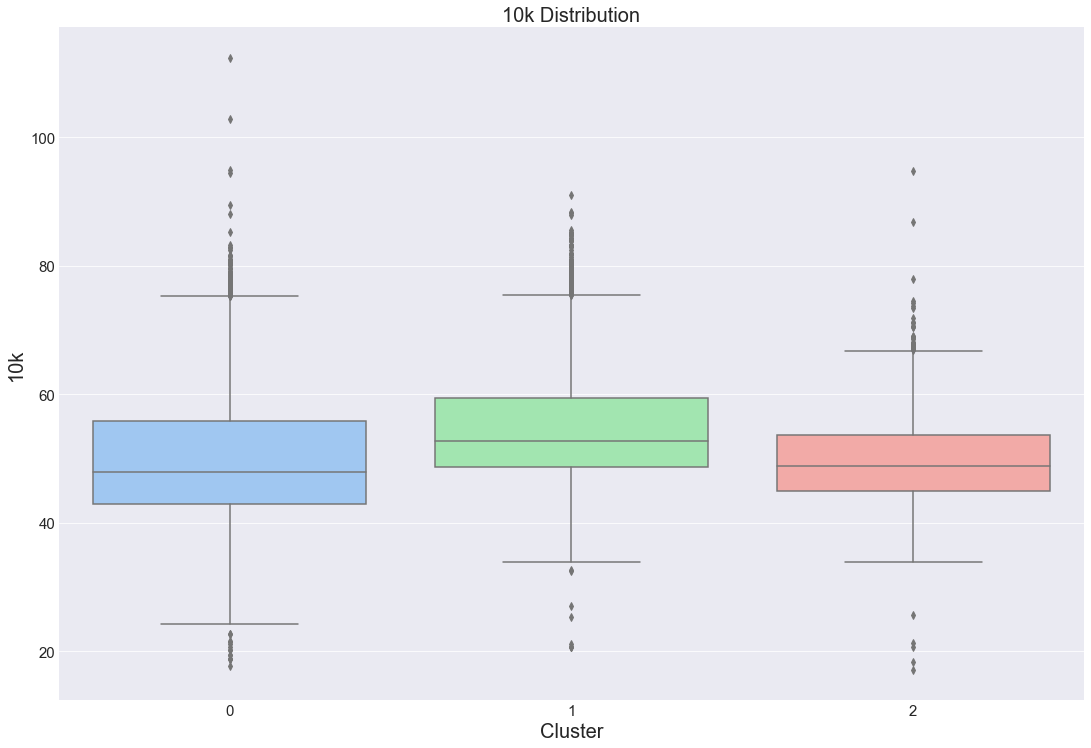

count    29103.000000
mean        51.827082
std          8.704309
min         17.120000
25%         45.580000
50%         50.430000
75%         57.200000
max        112.380000
Name: 10k, dtype: float64




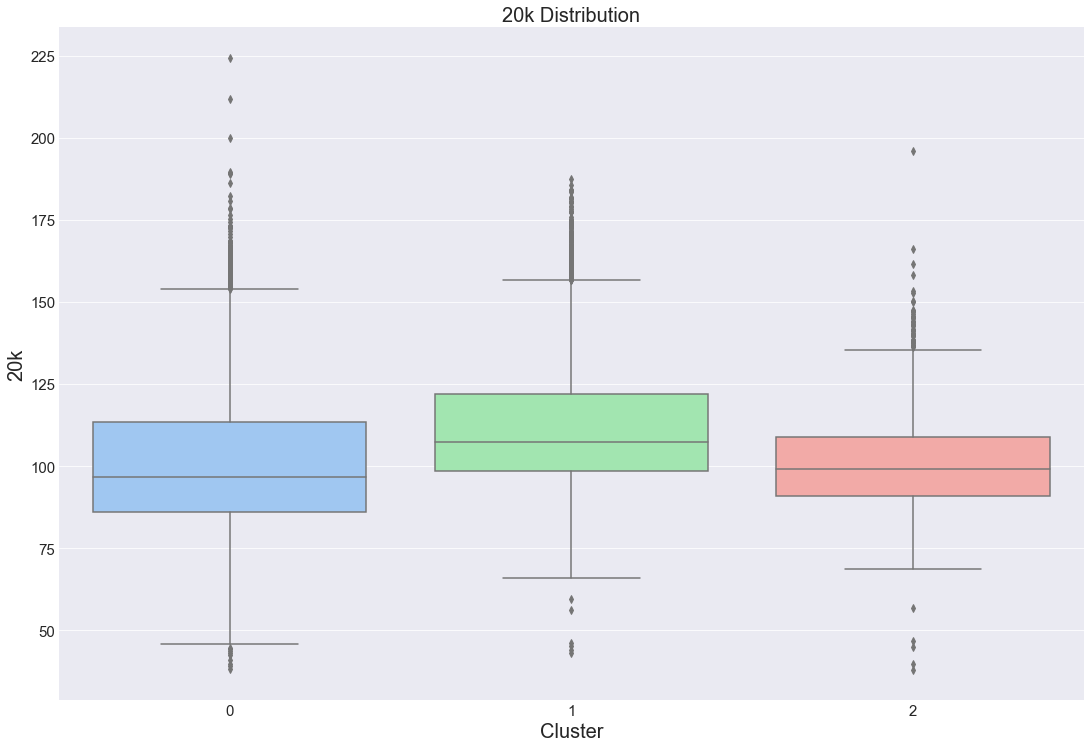

count    29103.000000
mean       105.728655
std         19.186131
min         38.020000
25%         92.070000
50%        102.350000
75%        116.650000
max        224.350000
Name: 20k, dtype: float64




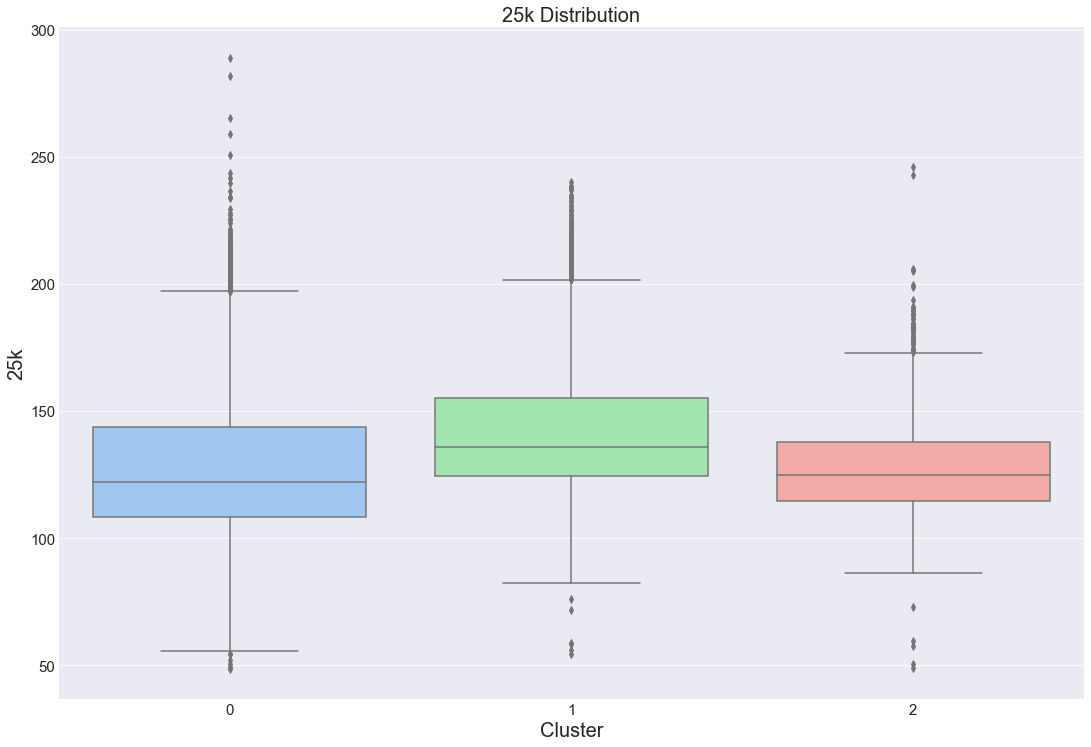

count    29103.000000
mean       134.107068
std         25.627832
min         48.550000
25%        115.920000
50%        129.230000
75%        148.430000
max        289.020000
Name: 25k, dtype: float64




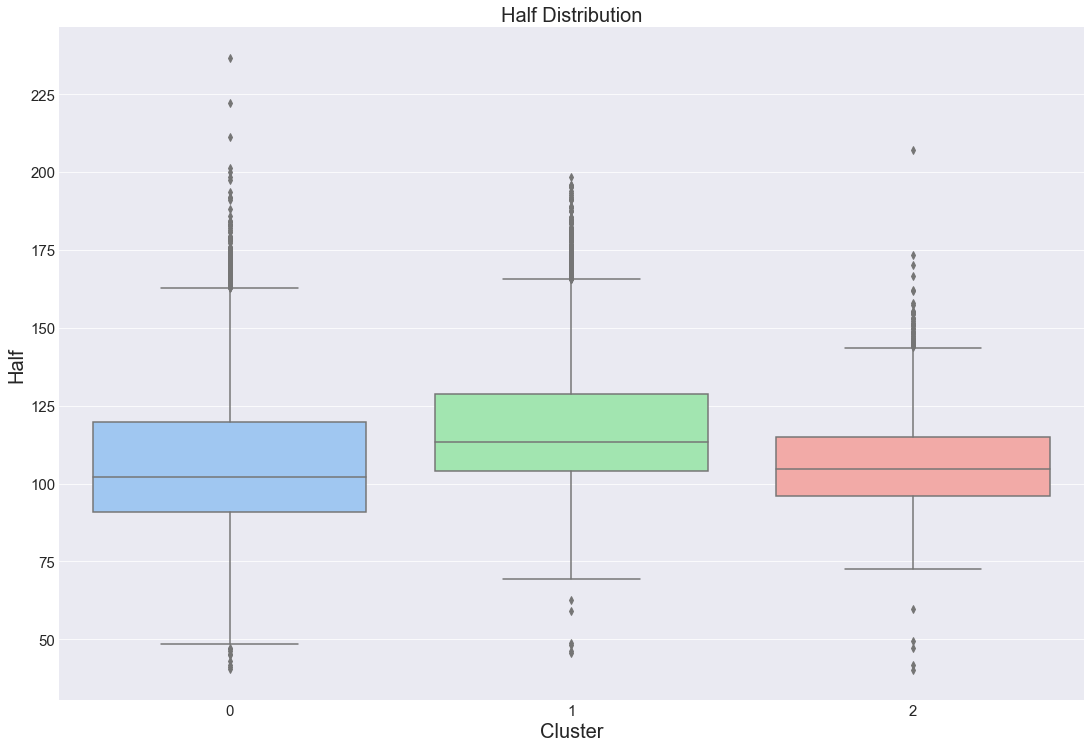

count    29103.000000
mean       111.639899
std         20.333671
min         40.200000
25%         97.180000
50%        108.020000
75%        123.200000
max        236.670000
Name: half, dtype: float64




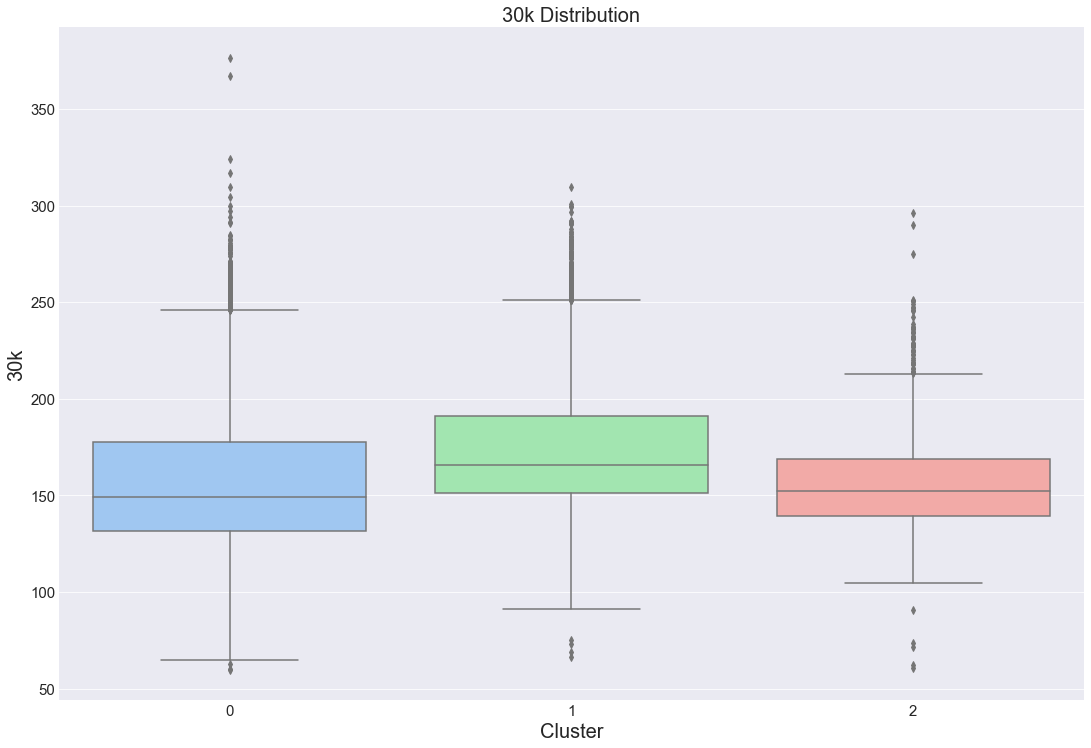

count    29103.000000
mean       164.525433
std         32.965134
min         59.770000
25%        141.075000
50%        157.980000
75%        183.125000
max        376.380000
Name: 30k, dtype: float64




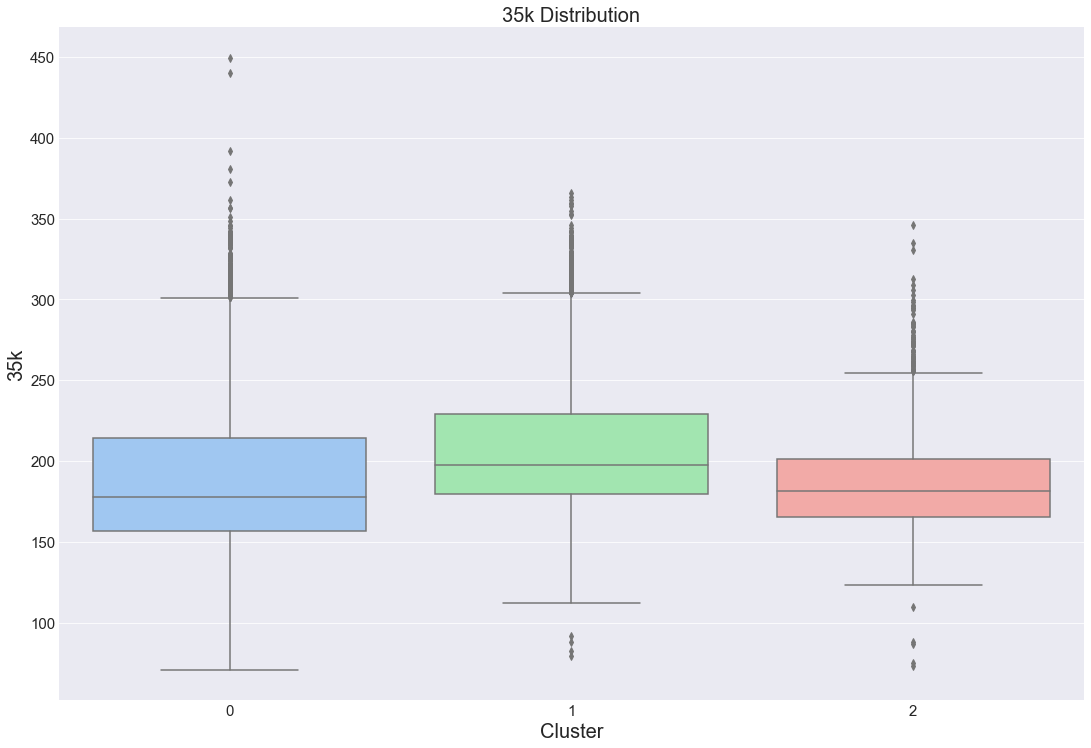

count    29103.000000
mean       196.771704
std         40.869530
min         70.830000
25%        167.550000
50%        188.400000
75%        220.270000
max        449.330000
Name: 35k, dtype: float64




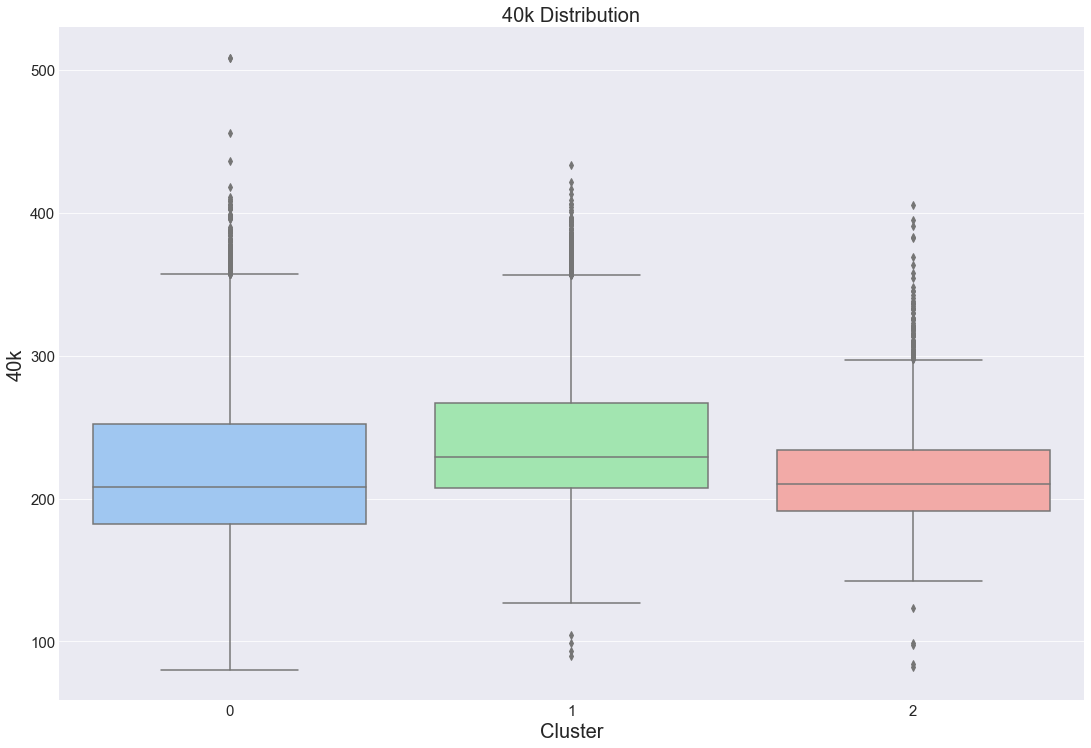

count    29103.000000
mean       229.037616
std         48.164805
min         80.180000
25%        194.280000
50%        219.120000
75%        257.780000
max        508.350000
Name: 40k, dtype: float64




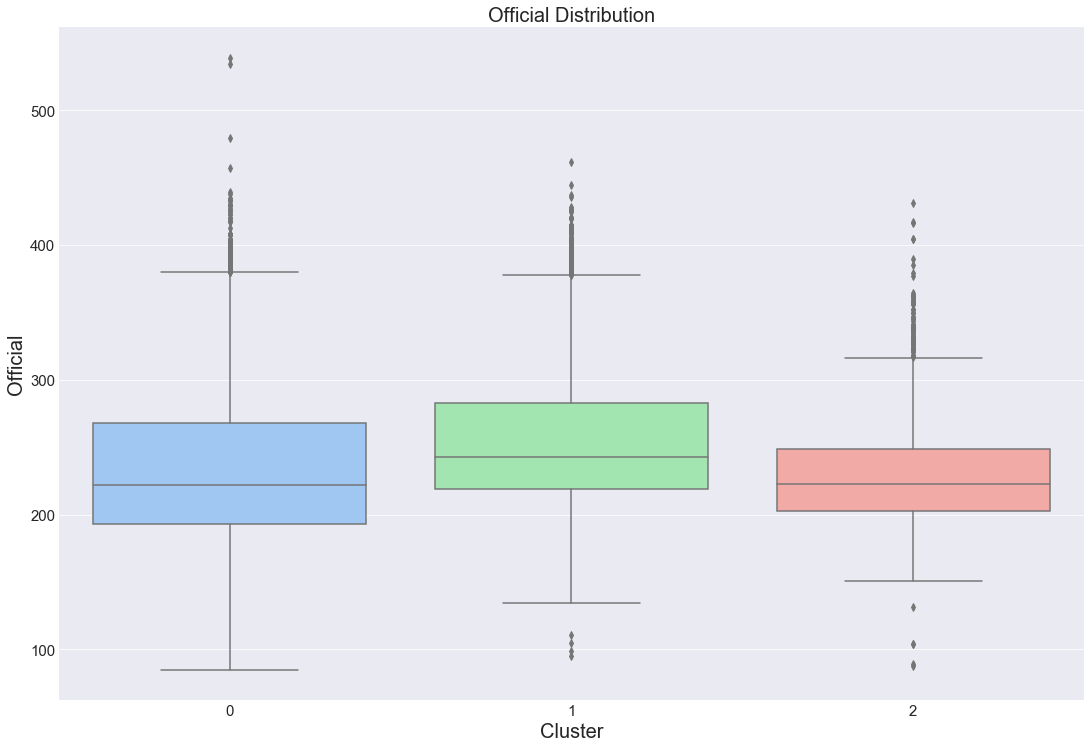

count    29103.000000
mean       242.813434
std         50.921669
min         84.820000
25%        205.980000
50%        232.570000
75%        273.310000
max        538.880000
Name: official, dtype: float64




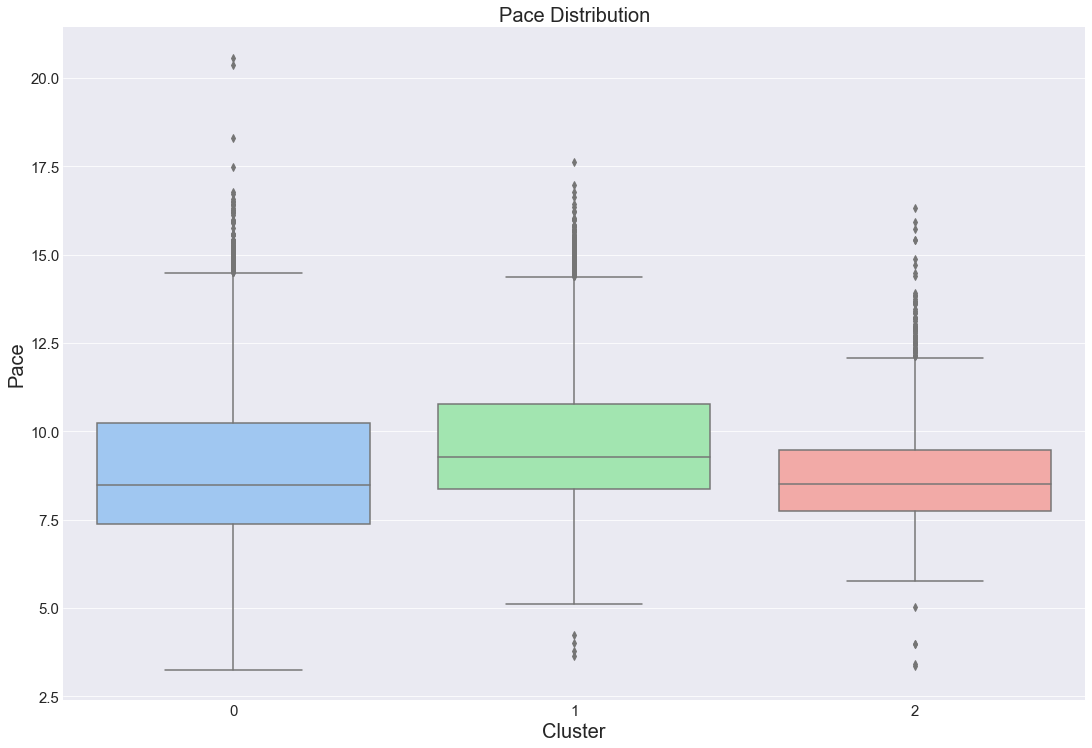

count    29103.000000
mean         9.269305
std          1.942165
min          3.250000
25%          7.870000
50%          8.880000
75%         10.430000
max         20.570000
Name: pace, dtype: float64




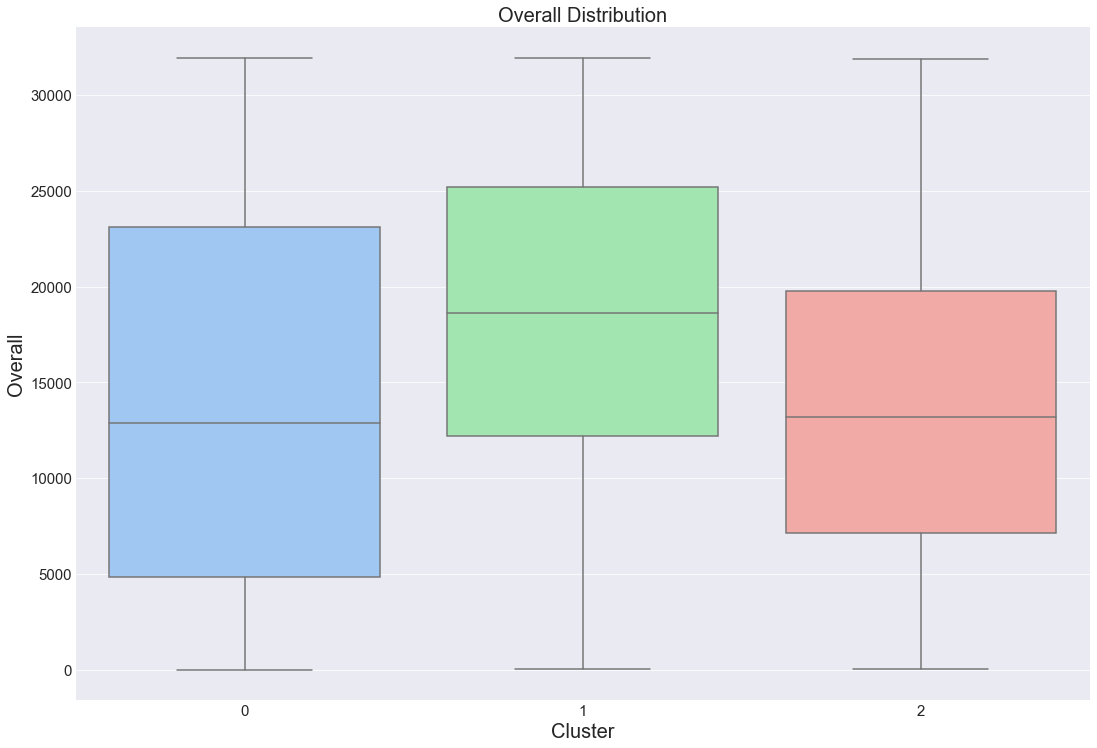

count    29103.000000
mean     15980.928942
std       9169.893647
min          1.000000
25%       8074.500000
50%      15997.000000
75%      23946.000000
max      31931.000000
Name: overall, dtype: float64




In [622]:
#Boxplots for each continuous feature and cluster

for col in boston[['age','5k', '10k', '20k', '25k', 'half', '30k', '35k', '40k', 'official', 'pace', 'overall']]:
    sns.set_style("darkgrid")
    sns.factorplot(kind='box', y=col, x='labels', data=boston, size=10, aspect=1.5, palette='pastel')
    plt.xlabel('Cluster', fontsize=20)
    plt.ylabel(col.capitalize(), fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(col.capitalize() + ' Distribution', fontsize=20)
    plt.show()
    print(boston[col].describe())
    print('\n')

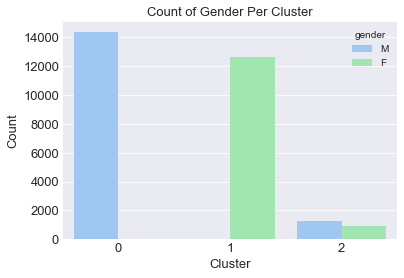

In [579]:
#Gender

sns.set_style("darkgrid")
sns.countplot(x='labels', hue='gender', data=boston, palette='pastel')
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Count of Gender Per Cluster', fontsize=13)
plt.show()

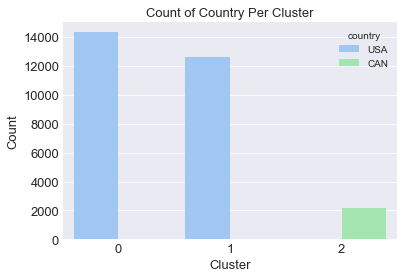

In [614]:
#Country

sns.set_style("darkgrid")
sns.countplot(x='labels', hue='country', data=boston, palette='pastel')
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Count of Country Per Cluster', fontsize=13)
plt.show()

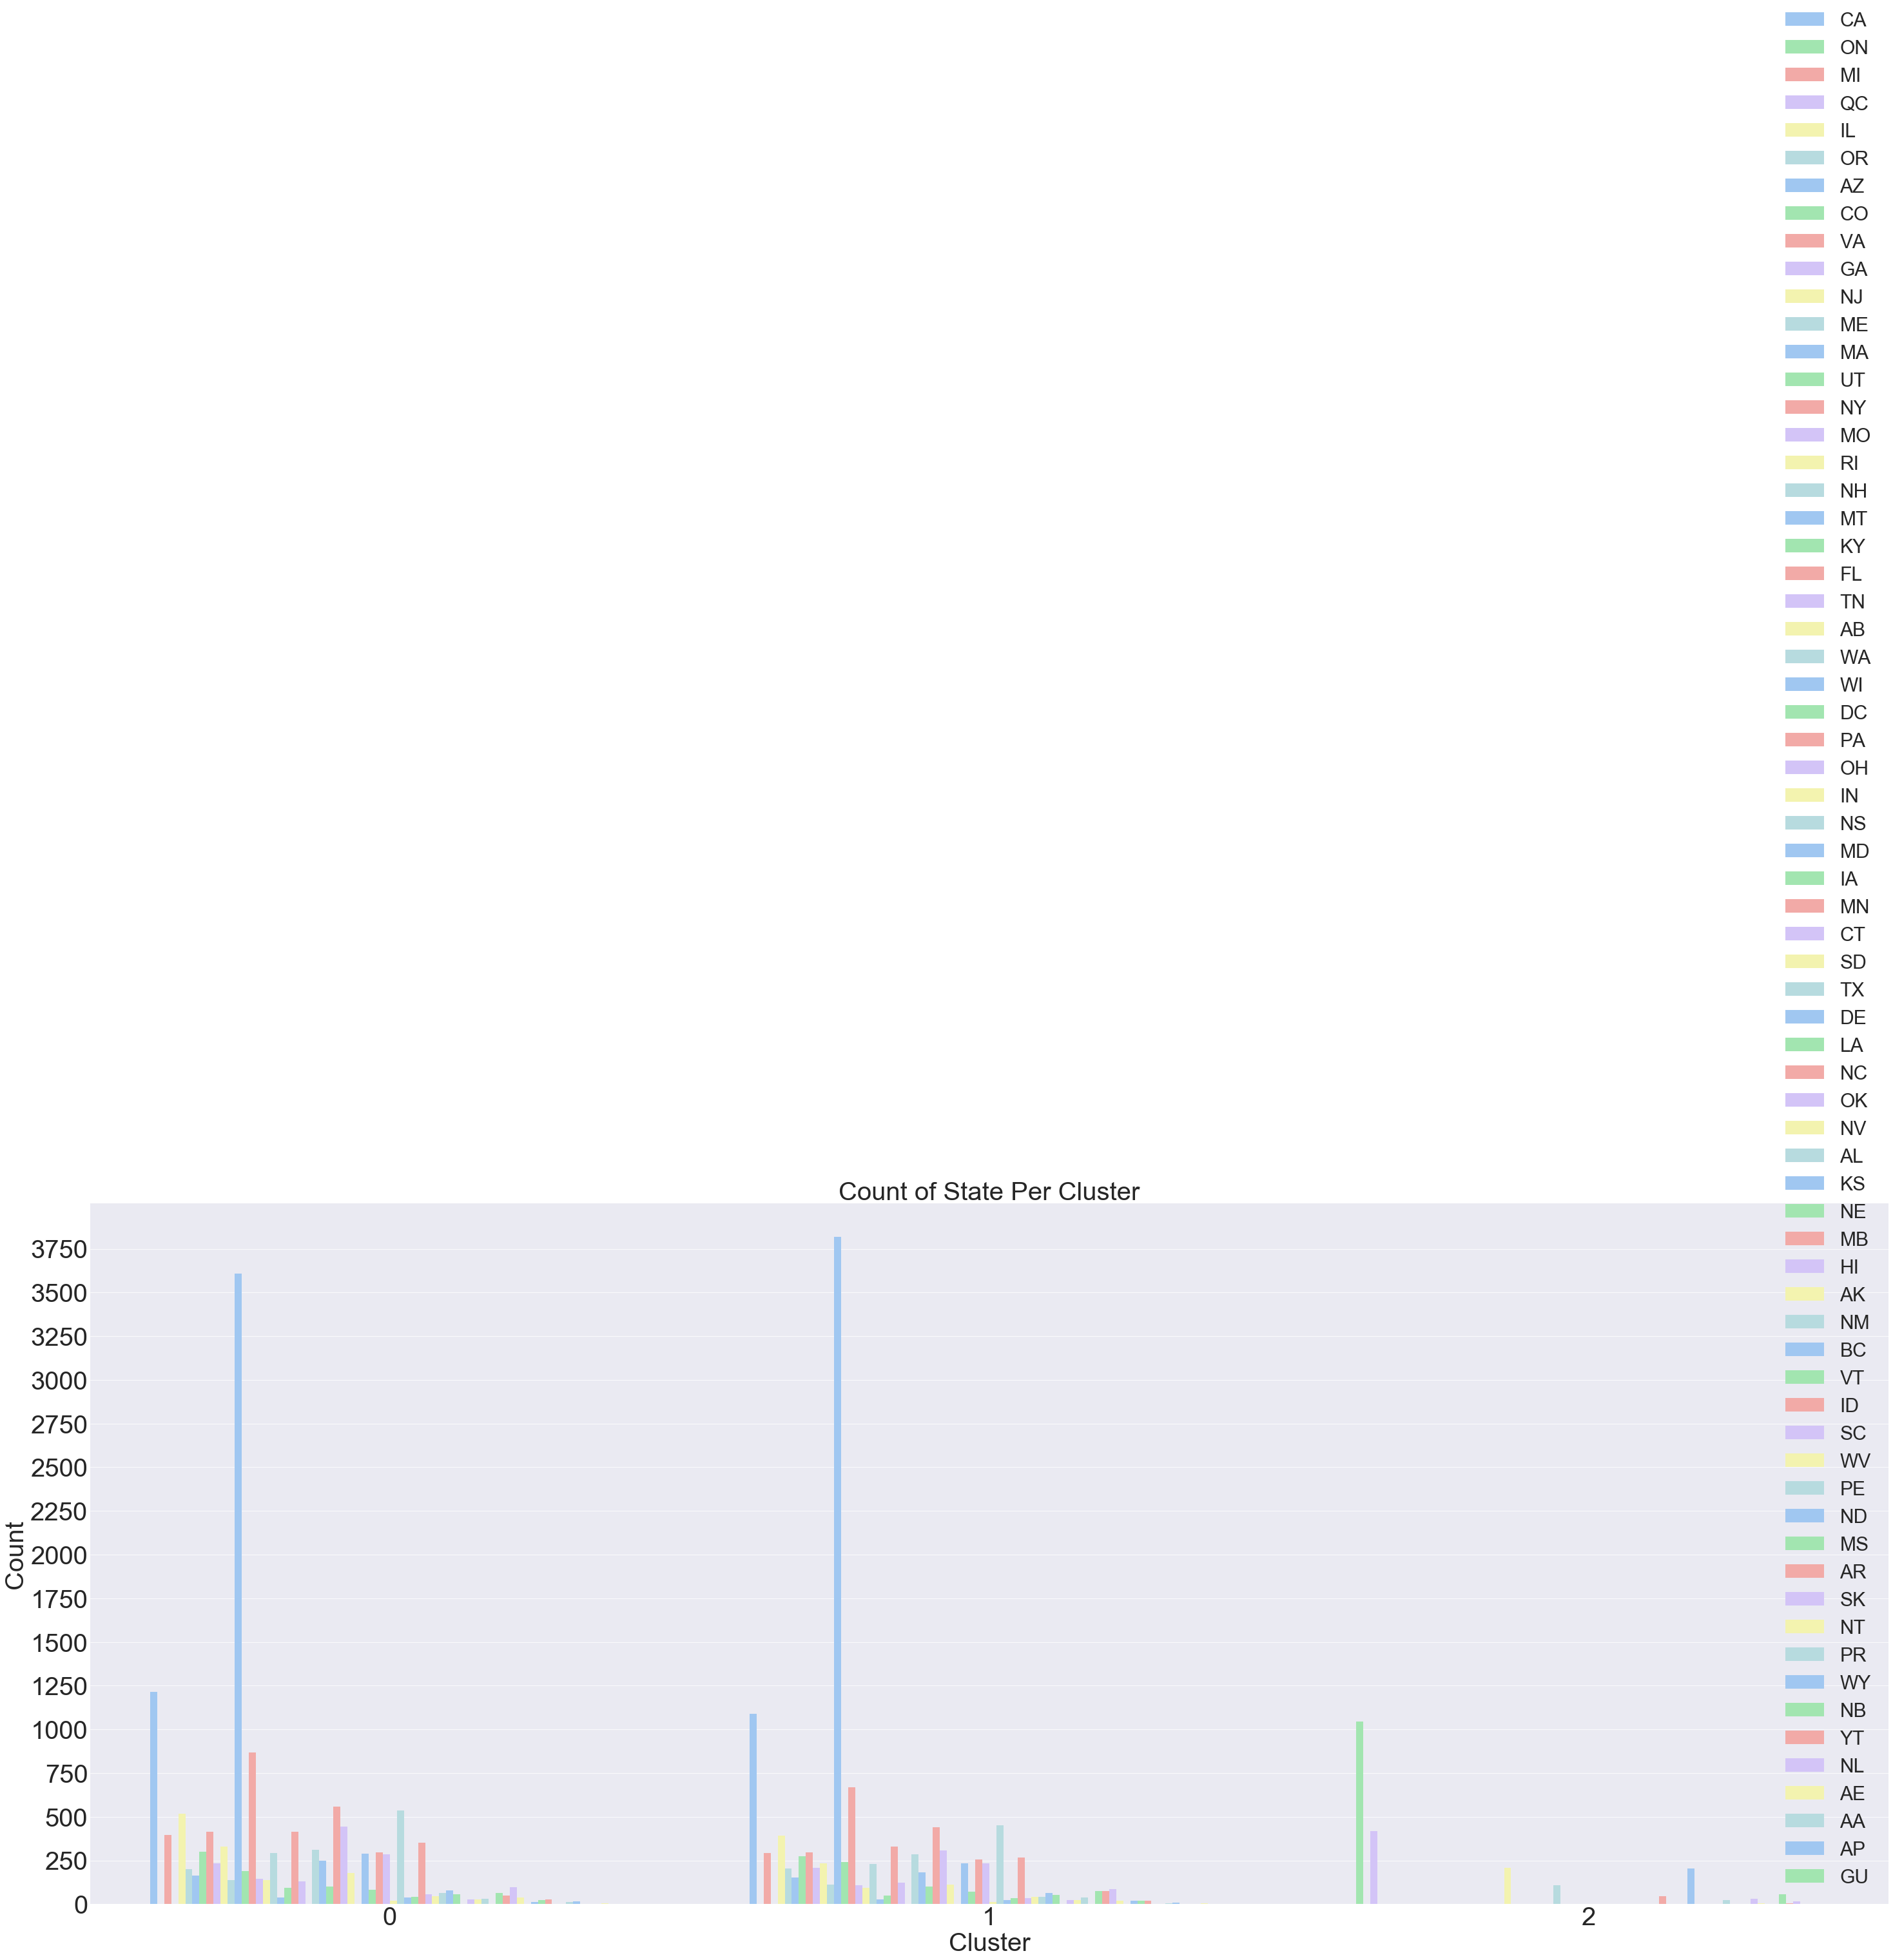

In [611]:
#State

sns.set_style("darkgrid")
plt.figure(figsize=[50,20])
ax = sns.countplot(x='labels', hue='state', data=boston, palette='pastel')
plt.xlabel('Cluster', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(np.arange(0, 4000, 250), fontsize=40)
plt.title('Count of State Per Cluster', fontsize=40)
plt.legend(fontsize=30)
plt.show()

# Evaluating Our K-Means Cluster Solution

In [619]:
#Without a ground truth, the best way to do this is to look at the silhouette coefficient

labels = kmeans.labels_
print(metrics.silhouette_score(X_train, labels, metric='euclidean'))

0.33503371376097824


# What Do Our Clusters Tell Us About the Boston Marathon Data?

Primarily looking at clusters 1 and 2, which are essentially split between male and female, we see that men have a higher mean age but produce consistently lower times during each interval marker (5k, 10k, 20k, etc.) throughout the marathon. 